1.**DATA UNDERSTANDING AND CLEANING**

In [73]:
import pandas as pd

In [74]:
#Load Csv File
df = pd. read_csv('/content/drive/MyDrive/in-vehicle-coupon-recommendation.csv')

In [75]:
#View All Columns
pd.set_option('display.max_columns', 26)
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


In [76]:
df.shape

(12684, 26)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [78]:
# Identify columns with exactly 2 unique values (0 and 1) and treat them as categorical
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

# Display binary columns
print("Binary categorical columns:", binary_columns)


Binary categorical columns: ['expiration', 'gender', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [79]:
for col in binary_columns:
        df[col] = df[col].astype('object')

              # Now `binary_columns` are treated as object

In [80]:
# Convert 'expiration' to numerical values in hours
df['expiration'] = df['expiration'].replace({'1d': 24, '2h': 2})
df['expiration'] = pd.to_numeric(df['expiration'], errors='coerce', downcast='integer')

In [81]:
# Convert 'toCoupon_GEQ5min' to 'object'
df['toCoupon_GEQ5min'] = df['toCoupon_GEQ5min'].astype('object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  int8  
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  object
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [83]:
#Check For Missing Values In Each Column
df.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [84]:
#Compute Missing Percentages
missing_pct=(df.isnull().sum() / len(df) ) *100

In [85]:
# Filter out columns with 0% missing data
missing_pct = missing_pct[missing_pct > 0]

# Convert the series to DataFrame
missing_pct_df = missing_pct.reset_index()

In [86]:
# Rename the columns for DataFrame
missing_pct_df.columns = ['Column', 'Missing_Percentage']

In [87]:
missing_pct_df

,Column,Missing_Percentage
0,car,99.148534
1,Bar,0.843582
2,CoffeeHouse,1.710817
3,CarryAway,1.190476
4,RestaurantLessThan20,1.024913
5,Restaurant20To50,1.490066


In [88]:
##drop Car Columns As Missing Percentage Exceeds 50%
df.drop(columns='car',  inplace=True)

In [89]:
# List of columns with missing values
categorical_columns = ['age', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Create an empty list to store the column names and their modes
mode_list = []

# Iterate through each column in the categorical columns
for column in categorical_columns:
    mode_value = df[column].mode()[0]  # Get the mode of the column
    mode_list.append([column, mode_value])  # Append column and its mode to the list

    # Fill missing values in the column with its mode and assign it back to the DataFrame
    df[column] = df[column].fillna(mode_value)

# Create a DataFrame from the mode_list
mode_df = pd.DataFrame(mode_list, columns=['Column', 'Mode'])





In [90]:
mode_df

,Column,Mode
0,age,21
1,Bar,never
2,CoffeeHouse,less1
3,CarryAway,1~3
4,RestaurantLessThan20,1~3
5,Restaurant20To50,less1


In [91]:
df.isnull().sum()


,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [92]:
#CHECK FOR UNIQUE VALUES

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display unique values for each categorical column
for column in categorical_columns:
    print(f"Unique values for {column}:")
    print(df[column].unique())  # This will show unique values without counts
    print("-" * 40)

Unique values for destination:
['No Urgent Place' 'Home' 'Work']
----------------------------------------
Unique values for passanger:
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
----------------------------------------
Unique values for weather:
['Sunny' 'Rainy' 'Snowy']
----------------------------------------
Unique values for time:
['2PM' '10AM' '6PM' '7AM' '10PM']
----------------------------------------
Unique values for coupon:
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
----------------------------------------
Unique values for gender:
['Female' 'Male']
----------------------------------------
Unique values for age:
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
----------------------------------------
Unique values for maritalStatus:
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
----------------------------------------
Unique values for has_children:
[1 0]
----------------------------------------
Unique values 

In [93]:
mapping = {
      'less1': 'Less than 1',
      'gt8': 'Greater than 8'
      }
df['Bar'] = df['Bar'].replace(mapping)
df['CoffeeHouse'] = df['CoffeeHouse'].replace(mapping)
df['CarryAway'] = df['CarryAway'].replace(mapping)
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].replace(mapping)
df['Restaurant20To50'] = df['Restaurant20To50'].replace(mapping)

In [94]:
occupation_mapping = {
    # Non-working group
    'Unemployed': 'Unemployed/Non-Working',
    'Student': 'Unemployed/Non-Working',

    # Corporate Work
    'Management': 'Corporate & Administrative Work',
    'Business & Financial': 'Corporate & Administrative Work',
    'Office & Administrative Support': 'Corporate & Administrative Work',

    # Engineering & Technical
    'Architecture & Engineering': 'Engineering & Technical',
    'Computer & Mathematical': 'Engineering & Technical',
    'Life Physical Social Science': 'Engineering & Technical',

    # Healthcare
    'Healthcare Support': 'Healthcare',
    'Healthcare Practitioners & Technical': 'Healthcare',

    # Sales, Service & Education
    'Sales & Related': 'Sales, Service & Education',
    'Personal Care & Service': 'Sales, Service & Education',
    'Food Preparation & Serving Related': 'Sales, Service & Education',
    'Education&Training&Library': 'Sales, Service & Education',

    # Construction & Craftsmanship
    'Construction & Extraction': 'Construction & Craftsmanship',
    'Installation Maintenance & Repair': 'Construction & Craftsmanship',
    'Farming Fishing & Forestry': 'Construction & Craftsmanship',
    'Building & Grounds Cleaning & Maintenance': 'Construction & Craftsmanship',
    'Arts Design Entertainment Sports & Media': 'Construction & Craftsmanship',
    # Transportation & Production
    'Transportation & Material Moving': 'Transportation & Production',
    'Production Occupations': 'Transportation & Production',

    # Legal Services
    'Legal': 'Legal Services',
    'Protective Service': 'Legal Services',
    'Community & Social Services': 'Legal Services',


    #Retired
    'Retired': 'Retired',
}

df['occupation'] = df['occupation'].replace(occupation_mapping)


In [95]:
#Rename Misspelled Columns Before One Hot Encoding
df = df.rename(columns={'passanger': 'passenger'})

In [96]:
#Create a dataframe copy for encoding
df_encoded = df.copy()

In [97]:
#Convert age and income to numerical for scaling

#Handling the Income column

def convert_income_to_midpoint(income):
   if 'Less than $12500' in income:
       return 6250 #midpoint
   elif '$100000 or More' in income:
       return 112500 #midpoint
   else:
       low, high = income.replace('$', '').split(' - ')
       return (int(low) + int(high)) / 2

df_encoded['income'] = df_encoded['income'].apply(convert_income_to_midpoint)
# Verify the changes
df_encoded['income'].unique()

array([ 43749.5,  68749.5,  18749.5,  81249.5,  56249.5,  31249.5,
       112500. ,  93749.5,   6250. ])

In [98]:
# Create a mapping for '50plus' and 'below21' and keep the others as they are
age_mapping = {
    'below21': 20,  # Assign 20 for 'below21'
    '50plus': 51    # Assign 51 for '50plus'
}

# Apply the mapping to the 'age' column and convert to numeric
df_encoded['age'] = df_encoded['age'].replace(age_mapping)

# Convert the entire 'age' column to numeric type
df_encoded['age'] = pd.to_numeric(df_encoded['age'])

# Verify the changes
df_encoded['age'].unique()

array([21, 46, 26, 31, 41, 51, 36, 20])

In [99]:
# Create a mapping dictionary from 12-hour format to 24-hour format
time_mapping = {
    '2PM': 14,
    '10AM': 10,
    '6PM': 18,
    '7AM': 7,
    '10PM': 22
}

df_encoded['time'] = df_encoded['time'].replace(time_mapping)

# Convert the entire 'age' column to numeric type
df_encoded['time'] = pd.to_numeric(df_encoded['time'])

# Verify the changes
df_encoded['time'].unique()

array([14, 10, 18,  7, 22])

In [100]:
#map with numerical order to maintain ordinal relationship
freq_mapping = {
    'never': 0,
    'Less than 1': 1,
    '1~3': 2,
    '4~8': 3,
    'Greater than 8': 4
}

df_encoded['Bar'] = df_encoded['Bar'].replace(freq_mapping).astype(int)
df_encoded['CoffeeHouse'] = df_encoded['CoffeeHouse'].replace(freq_mapping).astype(int)
df_encoded['CarryAway'] = df_encoded['CarryAway'].replace(freq_mapping).astype(int)
df_encoded['RestaurantLessThan20'] = df_encoded['RestaurantLessThan20'].replace(freq_mapping).astype(int)
df_encoded['Restaurant20To50'] = df_encoded['Restaurant20To50'].replace(freq_mapping).astype(int)



pd.set_option('future.no_silent_downcasting', True)

df_encoded['Bar'].unique()



array([0, 1, 2, 4, 3])

In [101]:
#Designate columns for one hot encoding
hot_columns = ['destination', 'passenger',  'weather', 'coupon', 'maritalStatus', 'gender', 'education', 'occupation']

In [102]:
df_encoded = pd.get_dummies(df_encoded, columns=hot_columns, drop_first=True)
pd.set_option('display.max_columns', 35)

In [103]:
#Place Numerical Columns To Be Scaled In A List
numerical_columns = ['expiration','temperature', 'age', 'income', 'time', 'Bar', 'CoffeeHouse', 'CarryAway']


In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])


In [106]:
df_encoded[numerical_columns].describe()


,expiration,temperature,age,income,time,Bar,CoffeeHouse,CarryAway
count,1.268400e+04,1.268400e+04,1.268400e+04,1.268400e+04,1.268400e+04,1.268400e+04,1.268400e+04,1.268400e+04
mean,8.963011e-17,7.170409e-17,2.420013e-16,8.066710e-17,2.688903e-17,-1.792602e-17,2.240753e-18,2.688903e-17
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.125982e+00,-1.738659e+00,-1.191932e+00,-1.429373e+00,-1.260923e+00,-9.396486e-01,-1.269355e+00,-2.606769e+00
25%,-1.125982e+00,-4.334298e-01,-1.096098e+00,-6.786659e-01,-7.062846e-01,-9.396486e-01,-4.581651e-01,-4.493725e-01
50%,8.881139e-01,8.717990e-01,-1.377593e-01,-3.033048e-01,3.323281e-02,-2.649331e-02,-4.581651e-01,-4.493725e-01
75%,8.881139e-01,8.717990e-01,8.205795e-01,8.227785e-01,7.727502e-01,8.866619e-01,3.530251e-01,6.293256e-01
max,8.881139e-01,8.717990e-01,1.778918e+00,1.761196e+00,1.512268e+00,2.712972e+00,1.975406e+00,1.708024e+00


In [107]:
df

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Female,21,Unmarried partner,1,Some college - no degree,Unemployed/Non-Working,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Female,21,Unmarried partner,1,Some college - no degree,Unemployed/Non-Working,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2,Female,21,Unmarried partner,1,Some college - no degree,Unemployed/Non-Working,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2,Female,21,Unmarried partner,1,Some college - no degree,Unemployed/Non-Working,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Female,21,Unmarried partner,1,Some college - no degree,Unemployed/Non-Working,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,24,Male,26,Single,0,Bachelors degree,"Sales, Service & Education",$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,24,Male,26,Single,0,Bachelors degree,"Sales, Service & Education",$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,24,Male,26,Single,0,Bachelors degree,"Sales, Service & Education",$75000 - $87499,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,24,Male,26,Single,0,Bachelors degree,"Sales, Service & Education",$75000 - $87499,never,never,1~3,4~8,1~3,1,1,1,0,1,0


In [108]:
df_encoded

,temperature,time,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,...,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,gender_Male,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Corporate & Administrative Work,occupation_Engineering & Technical,occupation_Healthcare,occupation_Legal Services,occupation_Retired,"occupation_Sales, Service & Education",occupation_Transportation & Production,occupation_Unemployed/Non-Working
0,-0.433430,0.033233,0.888114,-1.096098,1,-0.303305,-0.939649,-1.269355,-0.449373,3,2,1,0,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,0.871799,-0.706285,-1.125982,-1.096098,1,-0.303305,-0.939649,-1.269355,-0.449373,3,2,1,0,0,0,1,0,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2,0.871799,-0.706285,-1.125982,-1.096098,1,-0.303305,-0.939649,-1.269355,-0.449373,3,2,1,1,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,0.871799,0.033233,-1.125982,-1.096098,1,-0.303305,-0.939649,-1.269355,-0.449373,3,2,1,1,0,0,1,0,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,0.871799,0.033233,0.888114,-1.096098,1,-0.303305,-0.939649,-1.269355,-0.449373,3,2,1,1,0,0,1,0,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,-0.433430,0.772750,0.888114,-0.616929,0,0.822779,-0.939649,-1.269355,-0.449373,3,2,1,0,0,1,0,1,...,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
12680,-0.433430,-1.260923,0.888114,-0.616929,0,0.822779,-0.939649,-1.269355,-0.449373,3,2,1,0,0,0,1,1,...,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
12681,-1.738659,-1.260923,0.888114,-0.616929,0,0.822779,-0.939649,-1.269355,-0.449373,3,2,1,0,0,1,0,0,...,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
12682,-1.738659,-1.260923,0.888114,-0.616929,0,0.822779,-0.939649,-1.269355,-0.449373,3,2,1,1,1,0,1,0,...,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False


In [109]:
#save cleaned dataset
df_encoded.to_csv('/content/drive/MyDrive/cleaned-coupon-recommendation.csv', index=False)

**2. EXPLORATORY DATA ANALYSIS**

In [110]:
#USING COUNT PLOTS TO COMPARE PROPORTIONS
import seaborn as sns
import matplotlib.pyplot as plt

2.1 DATA VISUALIZATION

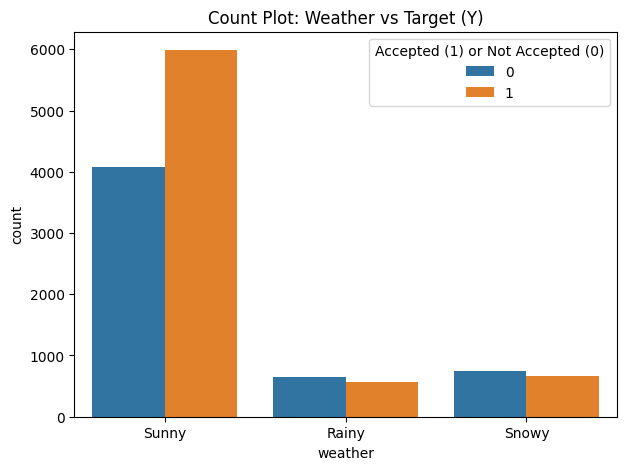

In [111]:
# Count plot for 'weather' vs 'Y'
plt.figure(figsize=(7, 5))
sns.countplot(x='weather', hue='Y', data=df)
plt.title('Count Plot: Weather vs Target (Y)')
plt.legend(title='Accepted (1) or Not Accepted (0)')
plt.show()

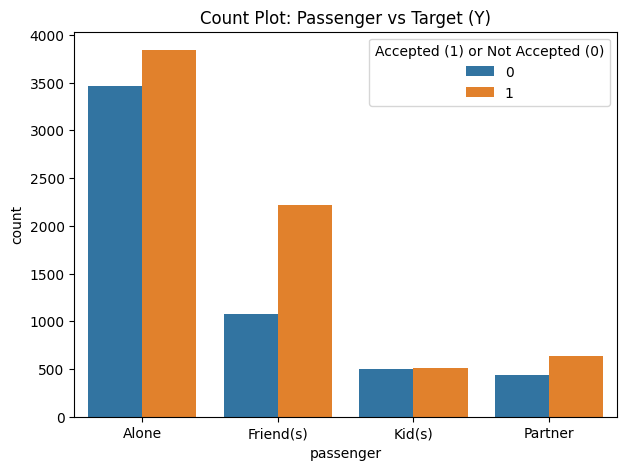

In [112]:
# Count plot for 'passenger' vs 'Y'
plt.figure(figsize=(7, 5))
sns.countplot(x='passenger', hue='Y', data=df)
plt.title('Count Plot: Passenger vs Target (Y)')
plt.legend(title='Accepted (1) or Not Accepted (0)')
plt.show()

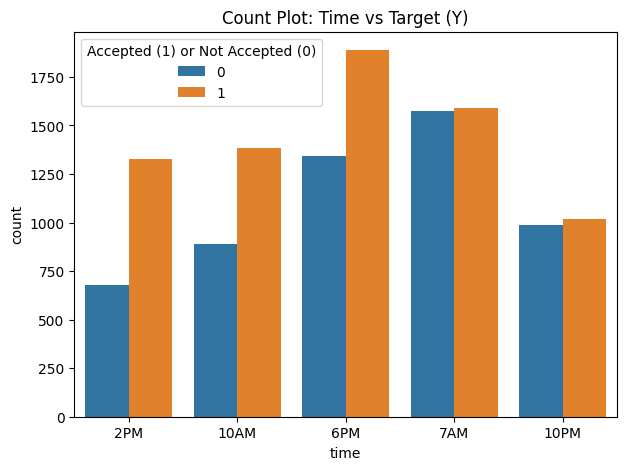

In [113]:
# Count plot for 'time' vs 'Y'
plt.figure(figsize=(7, 5))
sns.countplot(x='time', hue='Y', data=df)
plt.title('Count Plot: Time vs Target (Y)')
plt.legend(title='Accepted (1) or Not Accepted (0)')
plt.show()

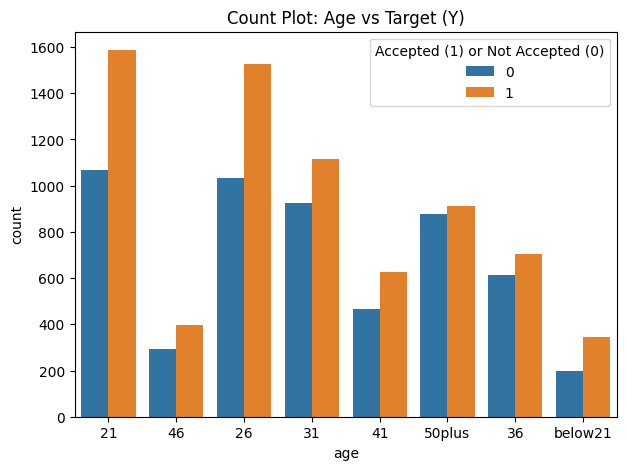

In [114]:
# Count plot for 'age' vs 'Y'
plt.figure(figsize=(7, 5))
sns.countplot(x='age', hue='Y', data=df)
plt.title('Count Plot: Age vs Target (Y)')
plt.legend(title='Accepted (1) or Not Accepted (0)')
plt.show()

2.2 TREND ANALYSIS

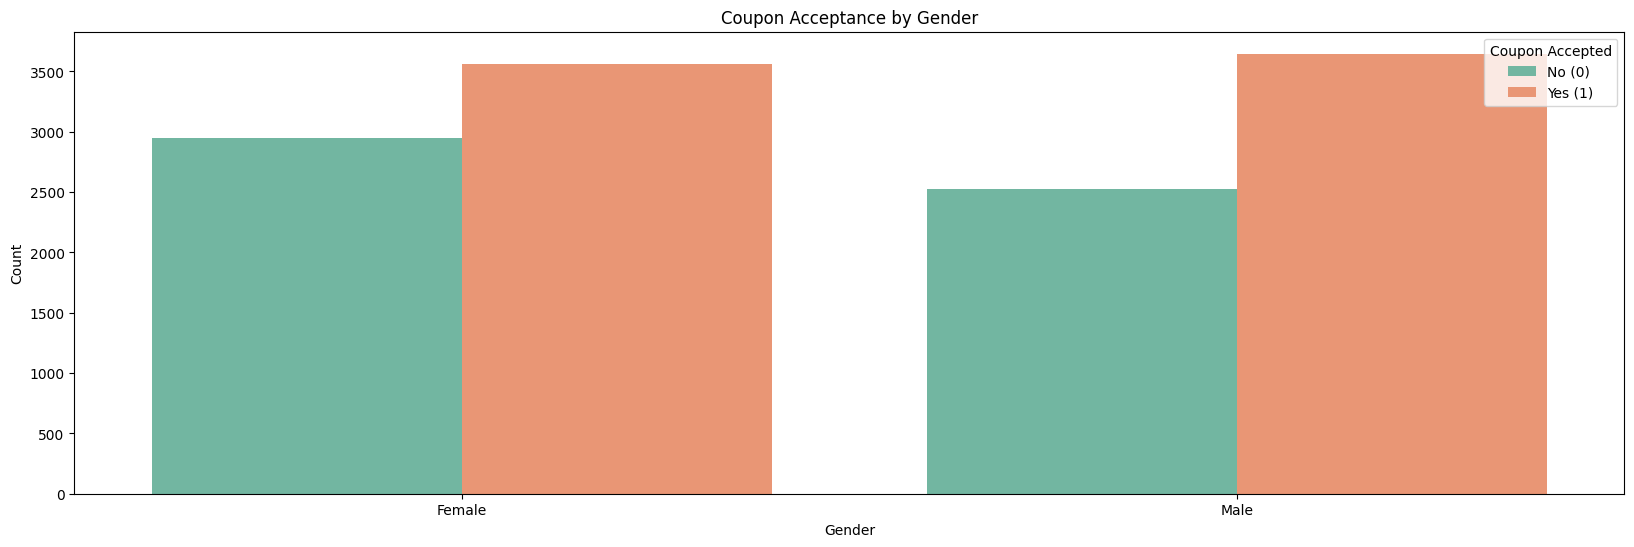

In [115]:
# Countplot for gender, coupon, education, income
plt.figure(figsize=(20, 6))
sns.countplot(x='gender', hue='Y', data=df, palette='Set2')

# Customize the plot
plt.title('Coupon Acceptance by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', loc='upper right', labels=['No (0)', 'Yes (1)'])
plt.show()

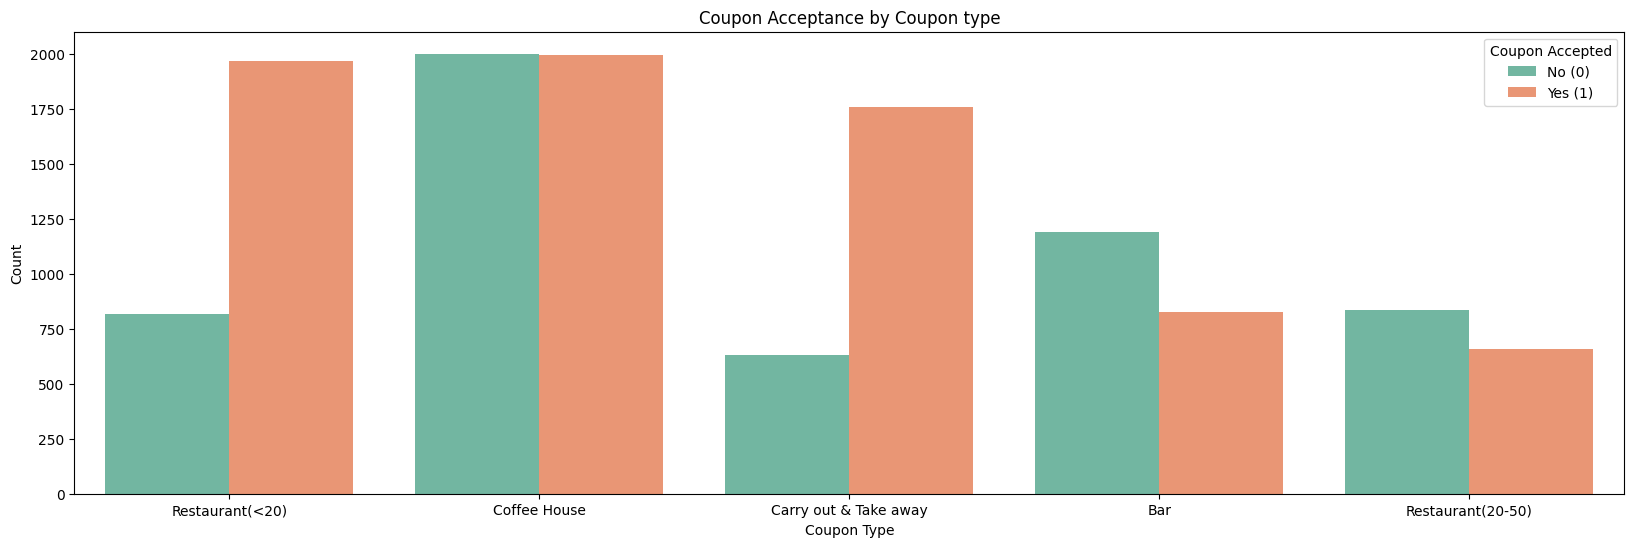

In [116]:
# Countplot for coupon, education, income
plt.figure(figsize=(20, 6))
sns.countplot(x='coupon', hue='Y', data=df, palette='Set2')

# Customize the plot
plt.title('Coupon Acceptance by Coupon type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', loc='upper right', labels=['No (0)', 'Yes (1)'])
plt.show()

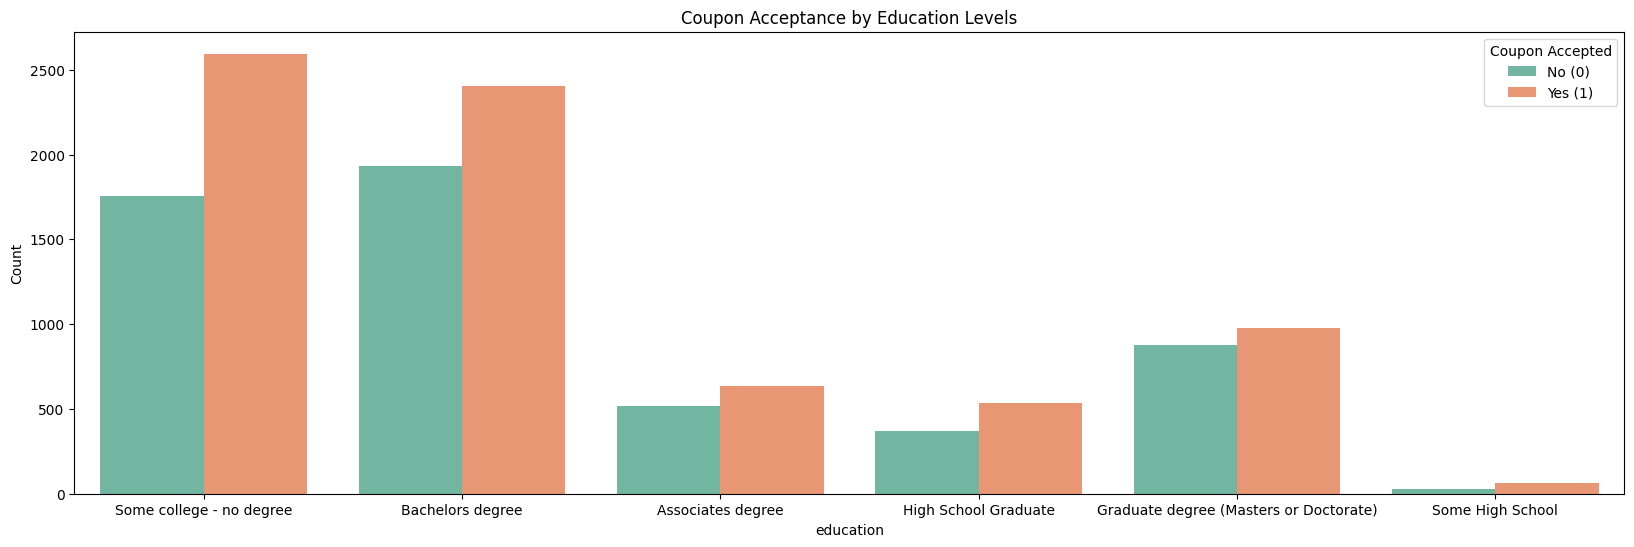

In [117]:
# Countplot for education, income
plt.figure(figsize=(20, 6))
sns.countplot(x='education', hue='Y', data=df, palette='Set2')

# Customize the plot
plt.title('Coupon Acceptance by Education Levels')
plt.xlabel('education')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', loc='upper right', labels=['No (0)', 'Yes (1)'])
plt.show()

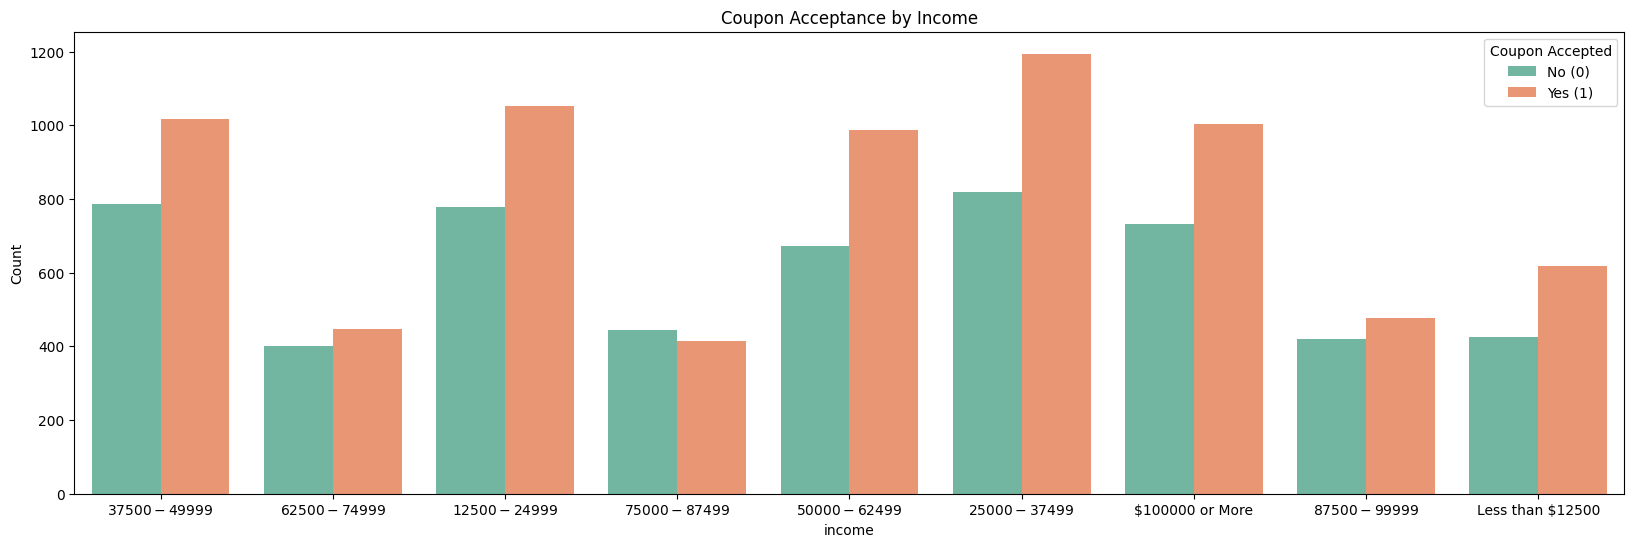

In [118]:
# Countplot for income
plt.figure(figsize=(20, 6))
sns.countplot(x='income', hue='Y', data=df, palette='Set2')

# Customize the plot
plt.title('Coupon Acceptance by Income')
plt.xlabel('income')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', loc='upper right', labels=['No (0)', 'Yes (1)'])
plt.show()

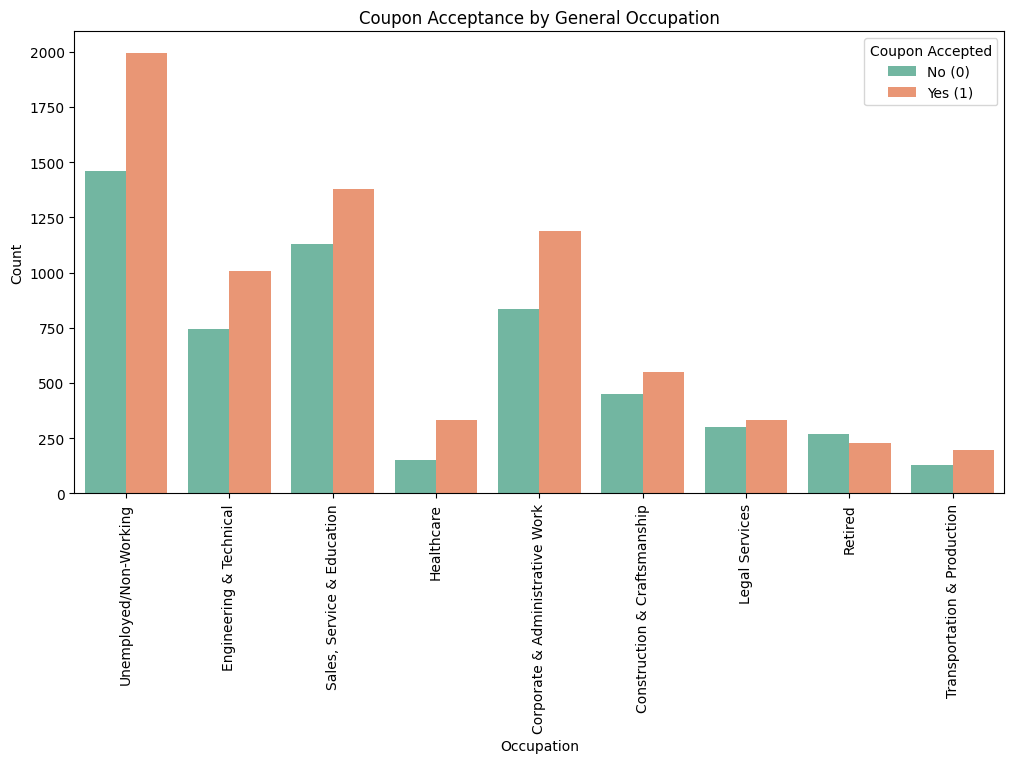

In [119]:
#count plot for occupation
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', hue='Y', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Coupon Acceptance by General Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', loc='upper right', labels=['No (0)', 'Yes (1)'])
plt.show()

# Show the plot
plt.show()

2.3 CORRELATION ANALYSIS

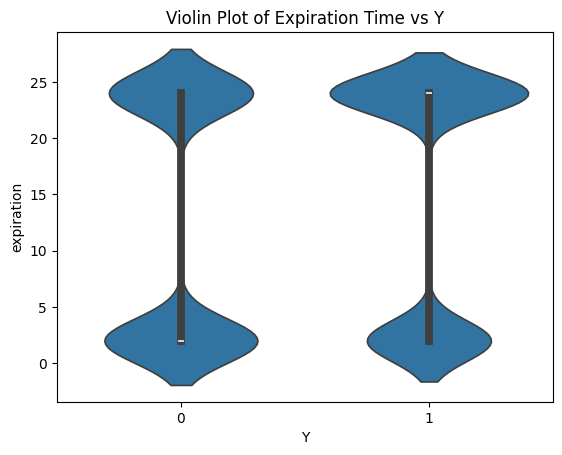

In [120]:
sns.violinplot(x='Y', y='expiration', data=df)
plt.title('Violin Plot of Expiration Time vs Y')
plt.show()

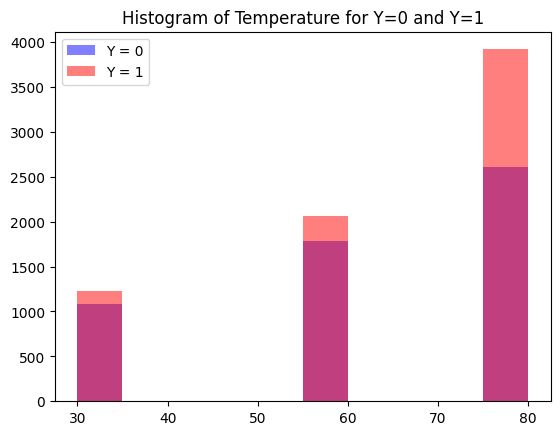

In [121]:
plt.hist(df[df['Y'] == 0]['temperature'], alpha=0.5, label='Y = 0', color='blue')
plt.hist(df[df['Y'] == 1]['temperature'], alpha=0.5, label='Y = 1', color='red')
plt.legend()
plt.title('Histogram of Temperature for Y=0 and Y=1')
plt.show()

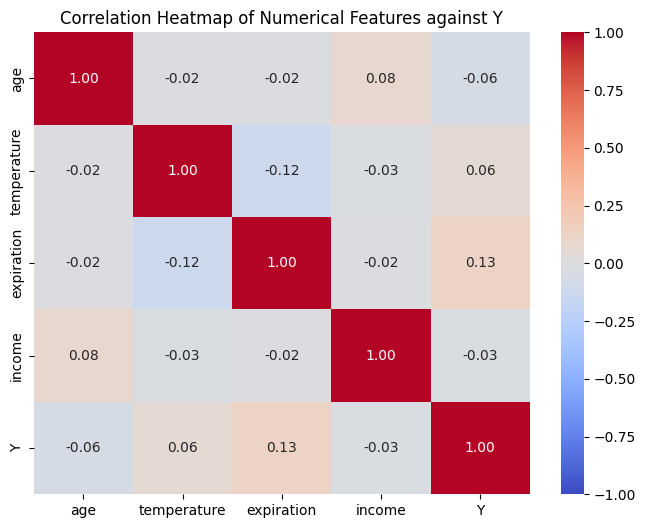

In [122]:

corr_df = df_encoded[['age', 'temperature', 'expiration', 'income', 'Y']]

# Compute the correlation matrix
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features against Y')
plt.show()

2.4 DISTRIBUTON VISUALIZATION

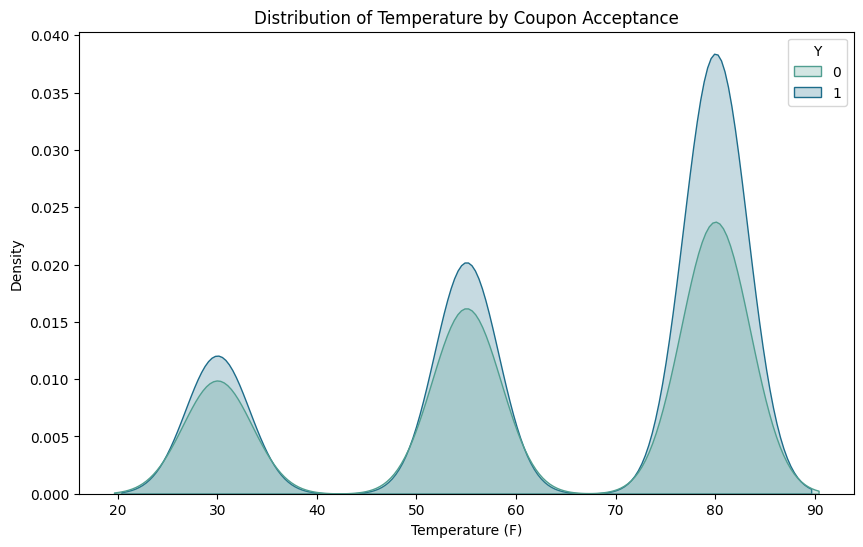

In [123]:
# KDE plot to visualize the distribution of 'temperature' based on coupon acceptance (Y)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='temperature', hue='Y', fill=True, palette='crest')

# Customize the plot
plt.title('Distribution of Temperature by Coupon Acceptance')
plt.xlabel('Temperature (F)')
plt.ylabel('Density')
plt.show()

In [124]:
# Melt the data for toCoupon_GEQXmin features for easier plotting
data_melt = df.melt(id_vars=['Y'], value_vars=['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'],
                      var_name='Driving Distance', value_name='Greater than X min')

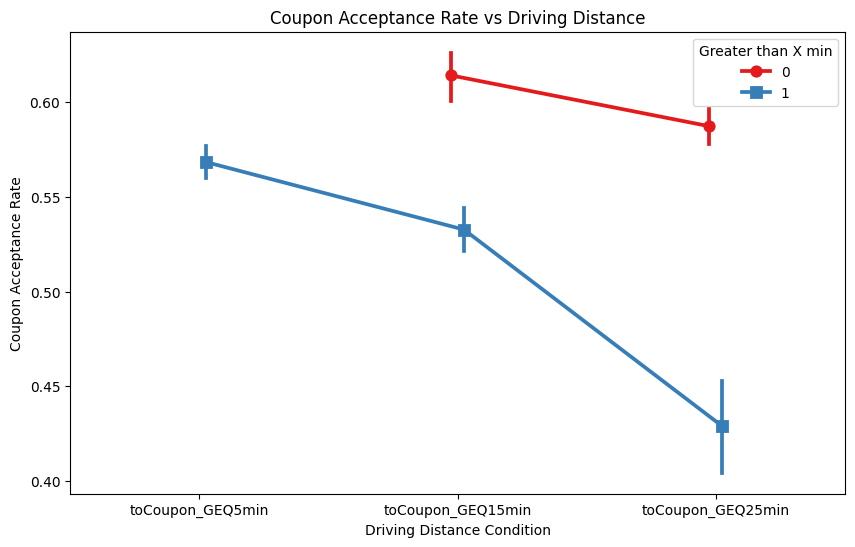

In [125]:
plt.figure(figsize=(10, 6))

# Create a point plot showing coupon acceptance rate vs driving distance
sns.pointplot(data=data_melt, x='Driving Distance', y='Y', hue='Greater than X min', dodge=True, markers=['o', 's'], palette='Set1')

# Customize the plot
plt.title('Coupon Acceptance Rate vs Driving Distance')
plt.xlabel('Driving Distance Condition')
plt.ylabel('Coupon Acceptance Rate')
plt.show()

3. **DATA** **MODELLLING**

In [126]:
#import scaled dataset
dataset = pd.read_csv('/content/drive/MyDrive/cleaned-coupon-recommendation.csv')
dataset

,temperature,time,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,...,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,gender_Male,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Corporate & Administrative Work,occupation_Engineering & Technical,occupation_Healthcare,occupation_Legal Services,occupation_Retired,"occupation_Sales, Service & Education",occupation_Transportation & Production,occupation_Unemployed/Non-Working
0,-0.433430,0.033233,0.888114,-1.096098,1,-0.303305,-0.939649,-1.269355,-0.449373,3,2,1,0,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
1,0.871799,-0.706285,-1.125982,-1.096098,1,-0.303305,-0.939649,-1.269355,-0.449373,3,2,1,0,0,0,1,0,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2,0.871799,-0.706285,-1.125982,-1.096098,1,-0.303305,-0.939649,-1.269355,-0.449373,3,2,1,1,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
3,0.871799,0.033233,-1.125982,-1.096098,1,-0.303305,-0.939649,-1.269355,-0.449373,3,2,1,1,0,0,1,0,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,0.871799,0.033233,0.888114,-1.096098,1,-0.303305,-0.939649,-1.269355,-0.449373,3,2,1,1,0,0,1,0,...,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,-0.433430,0.772750,0.888114,-0.616929,0,0.822779,-0.939649,-1.269355,-0.449373,3,2,1,0,0,1,0,1,...,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
12680,-0.433430,-1.260923,0.888114,-0.616929,0,0.822779,-0.939649,-1.269355,-0.449373,3,2,1,0,0,0,1,1,...,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
12681,-1.738659,-1.260923,0.888114,-0.616929,0,0.822779,-0.939649,-1.269355,-0.449373,3,2,1,0,0,1,0,0,...,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
12682,-1.738659,-1.260923,0.888114,-0.616929,0,0.822779,-0.939649,-1.269355,-0.449373,3,2,1,1,1,0,1,0,...,True,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False


3.1 SPLIT DATA INTO TEST AND TRAIN SETS

In [127]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (Y)
X = dataset.drop('Y', axis=1)  # Features (all columns except the target)
y = dataset['Y']  # Target (Y)

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [128]:
print("Training set target distribution:\n", y_train.value_counts(normalize=True))
print("Test set target distribution:\n", y_test.value_counts(normalize=True))


Training set target distribution:
 Y
1    0.571696
0    0.428304
Name: proportion, dtype: float64
Test set target distribution:
 Y
1    0.55538
0    0.44462
Name: proportion, dtype: float64


3.2 TRAINING USING LOGISTIC REGRESSION MODEL

In [129]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

3.3 TRAINING USING DECISION TREES

In [130]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

3.4 TRAINING USING RANDOM FOREST

In [131]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier()

3.5 EVALUATING MODEL PERFORMANCE...


In [132]:
# Predict on the test set
y_pred_logreg = log_reg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

In [133]:
from sklearn.metrics import accuracy_score

# Logistic Regression accuracy
logreg_acc = accuracy_score(y_test, y_pred_logreg)

# Decision Tree accuracy
dt_acc = accuracy_score(y_test, y_pred_tree)

# Random Forest accuracy
rf_acc = accuracy_score(y_test, y_pred_rf)




In [134]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision, Recall, and F1 for Logistic Regression
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

# Precision, Recall, and F1 for Decision Tree
dt_precision = precision_score(y_test, y_pred_tree)
dt_recall = recall_score(y_test, y_pred_tree)
dt_f1 = f1_score(y_test, y_pred_tree)

# Precision, Recall, and F1 for Random Forest
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)


In [135]:
# Create a DataFrame to tabulate the results
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [logreg_acc, dt_acc, rf_acc],
    'Precision': [logreg_precision, dt_precision, rf_precision],
    'Recall': [logreg_recall, dt_recall, rf_recall],
    'F1 Score': [logreg_f1, dt_f1, rf_f1]
})

In [136]:
metrics_df = metrics_df.round(2)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.67,0.68,0.77,0.72
1,Decision Tree,0.67,0.70,0.70,0.70
2,Random Forest,0.74,0.74,0.81,0.77


3.6 PERFORMANCE VISUALIZATION

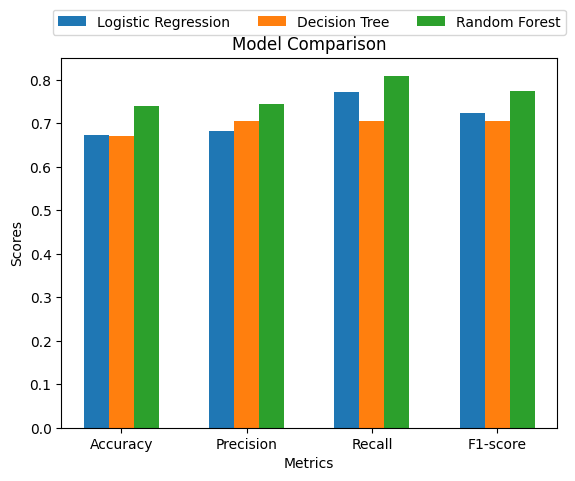

In [137]:
import numpy as np
# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
logreg_scores = [logreg_acc, logreg_precision, logreg_recall, logreg_f1]
dt_scores = [dt_acc, dt_precision, dt_recall, dt_f1]
rf_scores = [rf_acc, rf_precision, rf_recall, rf_f1]

index = np.arange(len(metrics))
bar_width = 0.2

plt.bar(index, logreg_scores, bar_width, label='Logistic Regression')
plt.bar(index + bar_width, dt_scores, bar_width, label='Decision Tree')
plt.bar(index + 2*bar_width, rf_scores, bar_width, label='Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison')
plt.xticks(index + bar_width, metrics)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.show()

In [138]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for each model
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_dt = confusion_matrix(y_test, y_pred_rf)

# Normalize the confusion matrices to get the rate of correct and incorrect predictions
conf_matrix_logreg_norm = conf_matrix_logreg.astype('float') / conf_matrix_logreg.sum(axis=1)[:, np.newaxis]
conf_matrix_tree_norm = conf_matrix_tree.astype('float') / conf_matrix_tree.sum(axis=1)[:, np.newaxis]
conf_matrix_dt_norm = conf_matrix_dt.astype('float') / conf_matrix_dt.sum(axis=1)[:, np.newaxis]

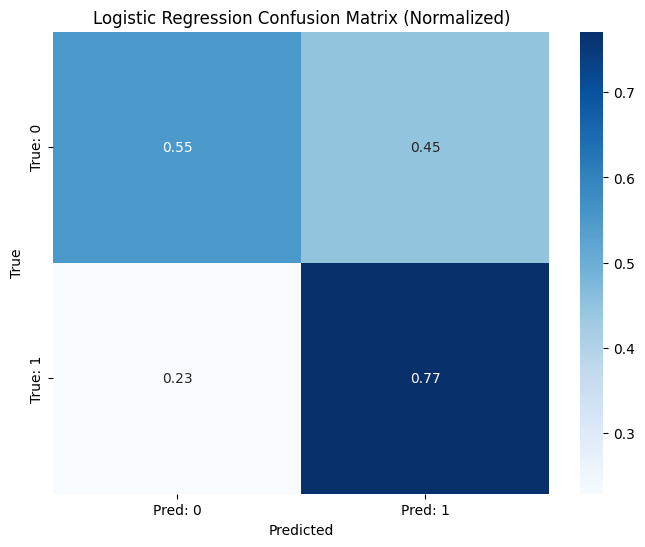

In [139]:
# Logistic Regression Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg_norm, annot=True, cmap="Blues", fmt=".2f", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Logistic Regression Confusion Matrix (Normalized)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

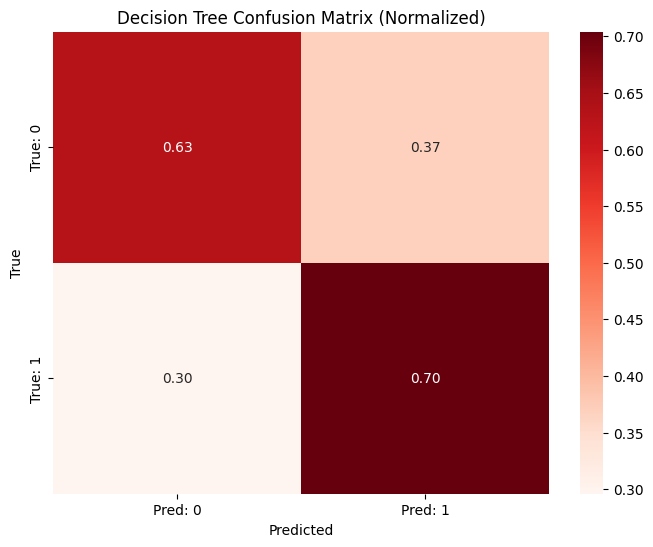

In [140]:
# Decision Tree Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree_norm, annot=True, cmap="Reds", fmt=".2f", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Decision Tree Confusion Matrix (Normalized)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

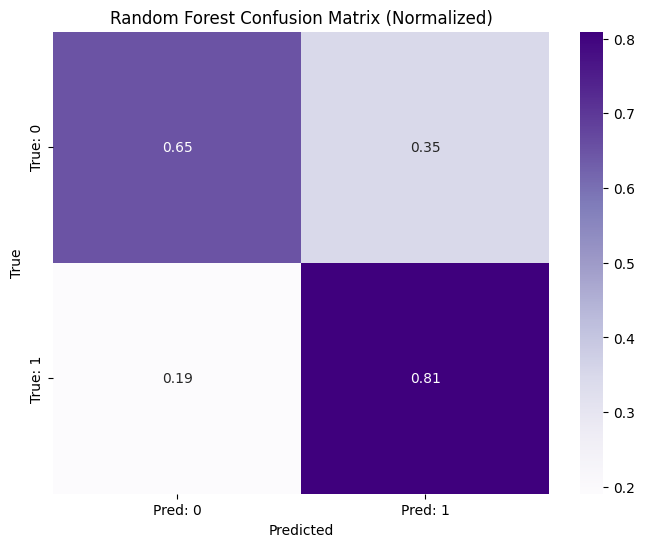

In [141]:
# Random Forest Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt_norm, annot=True, cmap="Purples", fmt=".2f", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Random Forest Confusion Matrix (Normalized)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

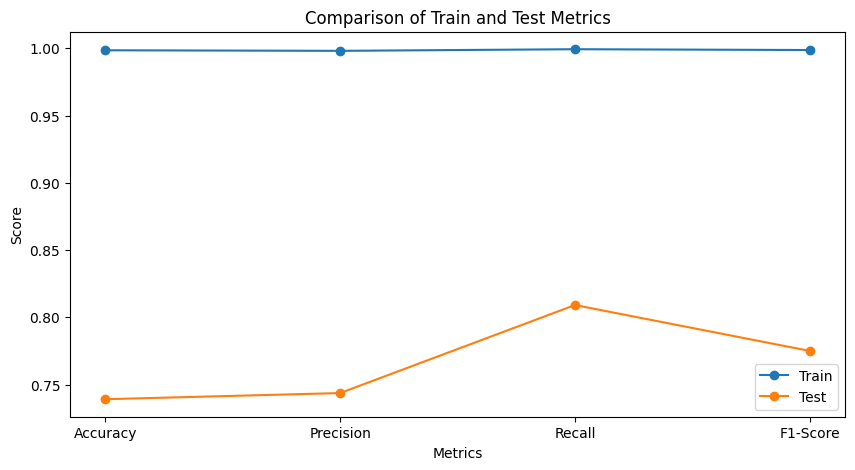

In [142]:
#CHECKING IF RANDOM FOREST MODEL UNDER OR OVERFITS

# Train predictions
y_train_pred_rf = random_forest.predict(X_train)


# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
train_precision = precision_score(y_train, y_train_pred_rf)
train_recall = recall_score(y_train, y_train_pred_rf)
train_f1 = f1_score(y_train, y_train_pred_rf)


# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [train_accuracy,train_precision, train_recall, train_f1]
test_scores = [rf_acc, rf_precision, rf_recall, rf_f1]

x = range(len(metrics))

plt.figure(figsize=(10, 5))
plt.plot(x, train_scores, label='Train', marker='o')
plt.plot(x, test_scores, label='Test', marker='o')
plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Train and Test Metrics')
plt.legend()
plt.show()


In [143]:
#param_grid = {
   # 'n_estimators': [100, 200],
   # 'max_depth': [10, 20, 30],
   # 'min_samples_split': [2, 5],
   # 'min_samples_leaf': [1, 2],
   # 'max_features': ['sqrt', 'log2', None]
#}


param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

**4. HYPER PARAMETER TUNING**

In [144]:
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [145]:
#get best model
best_rf_model = grid_search.best_estimator_
print(f"Best model: {best_rf_model}")

Best model: RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=200,
                       random_state=42)


In [146]:
# Or, if you prefer to instantiate a new model with the best parameters:
#best_rf_model = RandomForestClassifier(max_depth=20, max_features='log2',
#                                       min_samples_leaf=1, min_samples_split=4,
#                                       n_estimators=150, class_weight='balanced', random_state=42)

In [147]:
# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=200,
                       random_state=42)

3.2 EVALUATING FINED TUNED MODEL PERFOORMANCE...

In [148]:
# Predict on the test set using the fine-tuned model
y_pred_tuned_rf = best_rf_model.predict(X_test)

In [149]:
 # Evaluate the fine-tuned model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_tuned_rf)
precision_rf_tuned = precision_score(y_test, y_pred_tuned_rf)
recall_rf_tuned = recall_score(y_test, y_pred_tuned_rf)
f1_rf_tuned = f1_score(y_test, y_pred_tuned_rf)

print(f"Tuned Random Forest - Accuracy: {accuracy_rf_tuned:.4f}, Precision: {precision_rf_tuned:.4f}, Recall: {recall_rf_tuned:.4f}, F1-Score: {f1_rf_tuned:.4f}")

Tuned Random Forest - Accuracy: 0.7422, Precision: 0.7349, Recall: 0.8382, F1-Score: 0.7832


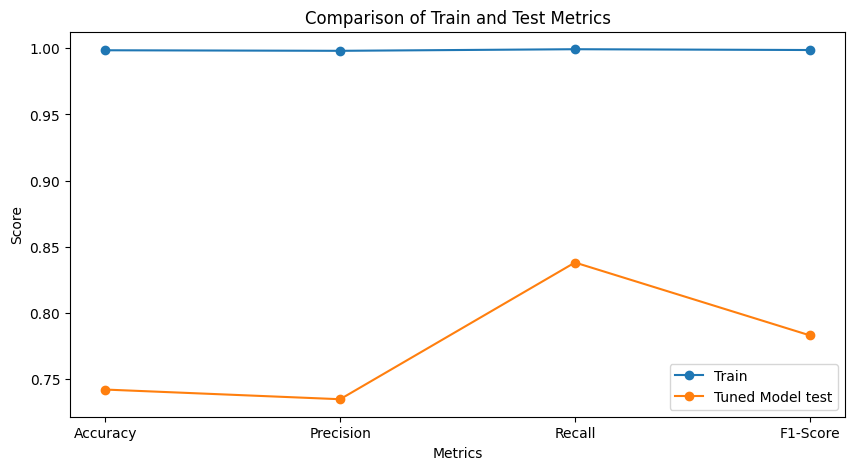

In [150]:
#visualize results again

# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [train_accuracy,train_precision, train_recall, train_f1]
tuned_test_scores = [accuracy_rf_tuned, precision_rf_tuned, recall_rf_tuned, f1_rf_tuned]

x = range(len(metrics))

plt.figure(figsize=(10, 5))
plt.plot(x, train_scores, label='Train', marker='o')
plt.plot(x, tuned_test_scores, label='Tuned Model est', marker='o')
plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Train and Test Metrics')
plt.legend()
plt.show()

In [151]:
# Create a DataFrame to tabulate the results
new_metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Tuned RF'],
    'Accuracy': [logreg_acc, dt_acc, rf_acc, accuracy_rf_tuned],
    'Precision': [logreg_precision, dt_precision, rf_precision, precision_rf_tuned],
    'Recall': [logreg_recall, dt_recall, rf_recall, recall_rf_tuned],
    'F1 Score': [logreg_f1, dt_f1, rf_f1, f1_rf_tuned]
})

In [152]:
new_metrics_df = new_metrics_df.round(2)
new_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.67,0.68,0.77,0.72
1,Decision Tree,0.67,0.70,0.70,0.70
2,Random Forest,0.74,0.74,0.81,0.77
3,Tuned RF,0.74,0.73,0.84,0.78
